In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import duckdb

In [2]:
df = pd.read_csv('USMNT_2023.csv')
df.head()

,Player,Position,Birthday,Age,Club,League,Market_Value
0,Gabriel Slonina,GK,May-15-2004,19,Chelsea,EPL,8000000
1,Matt Turner,GK,June-24-1994,28,Arsenal,EPL,5000000
2,Zach Steffen,GK,April-2-1995,28,Middlesbrough,EFL Championship,4500000
3,Sean Johnson,GK,May-31-1989,33,Toronto FC,MLS,1500000
4,Ethan Horvath,GK,June-9-1995,27,Luton Town,EFL Championship,1000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Player        66 non-null     object
 1   Position      66 non-null     object
 2   Birthday      66 non-null     object
 3   Age           66 non-null     int64 
 4   Club          66 non-null     object
 5   League        66 non-null     object
 6   Market_Value  66 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 3.7+ KB


I want to be able to sort by the date the players were born so I need to change the months name to its numerical counterpart. But before I can get to that I need to expand the date to replace the month

In [4]:
months = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5,'June':6,'July':7, 'August':8,'September':9,'October':10, 'November':11, 'December':12}

In [5]:
df['Birthday'] = df['Birthday'].astype('string')
df['month'] = df['Birthday'].str.split('-', expand = True)[0]
df['day'] = df['Birthday'].str.split('-', expand = True)[1]
df['year'] = df['Birthday'].str.split('-', expand = True)[2]

Using the map function to replace the name to the numerical counterpart

In [6]:
df['month'] = df['month'].map(months)

In [7]:
df = df.drop(['month','day','year'],axis =1)

In [8]:
df['Birthday'] = pd.to_datetime(df['Birthday'])

In [9]:
df.head()

,Player,Position,Birthday,Age,Club,League,Market_Value
0,Gabriel Slonina,GK,2004-05-15,19,Chelsea,EPL,8000000
1,Matt Turner,GK,1994-06-24,28,Arsenal,EPL,5000000
2,Zach Steffen,GK,1995-04-02,28,Middlesbrough,EFL Championship,4500000
3,Sean Johnson,GK,1989-05-31,33,Toronto FC,MLS,1500000
4,Ethan Horvath,GK,1995-06-09,27,Luton Town,EFL Championship,1000000


In [10]:
df.value_counts('League')

League
MLS                   26
EPL                    8
EFL Championship       5
Eredivisie             3
SPL                    3
Liga MX                2
Jupiler Pro League     2
La Liga                2
Bundesliga             2
Ligue 1                2
Segunda Division       1
Superligaen            1
Super Lig              1
Serie A (Brazil)       1
Serie A                1
Belgian Pro League     1
Primera Liga           1
Eliteserien            1
Bundesliga 2           1
Bundesliga             1
USL Championship       1
dtype: int64

In [11]:
df['League'] = df['League'].str.replace('Jupiler Pro League', 'Belgian Pro League')

<AxesSubplot:xlabel='Market_Value', ylabel='Position'>

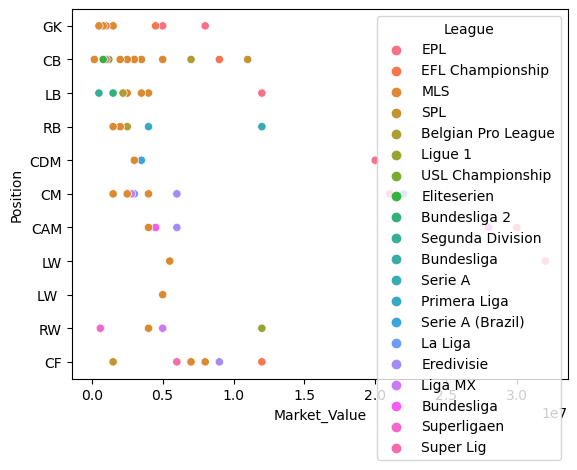

In [12]:
sns.scatterplot(data = df, y = 'Position',x = 'Market_Value', hue = 'League')

In [13]:
df.League.unique()

array(['EPL', 'EFL Championship', 'MLS', 'SPL', 'Belgian Pro League',
       'Ligue 1', 'USL Championship', 'Eliteserien', 'Bundesliga 2',
       'Segunda Division', 'Bundesliga ', 'Serie A', 'Primera Liga',
       'Serie A (Brazil)', 'La Liga', 'Eredivisie', 'Liga MX',
       'Bundesliga', 'Superligaen', 'Super Lig'], dtype=object)

The leagues broken down by country they are in:

* England - EPL, EFL Championship
* Scotland - SPL
* USA - MLS, USL Championship
* Belgium - Belgian Pro League
* France - Ligue 1
* Norway - Eliteserien
* Germany - Bundesliga 2, Bundesliga
* Spain - Segunda Division, La Liga
* Italy - Serie A
* Portugal - Primera Liga
* Brazil - Serie A (Brazil)
* Netherlands - Eredivisie
* Mexico - Liga MX
* Denmark - Superligaen
* Turkey - Super Lig








In [14]:
df['Country_of_League'] = df.loc[:,'League']

Add a new column which has the country where the league plays in

In [15]:
df.loc[df['Country_of_League'] == 'EPL','Country_of_League'] = 'England'
df.loc[df['Country_of_League'] == 'EFL Championship','Country_of_League'] = 'England'
df.loc[df['Country_of_League'] == 'SPL','Country_of_League'] = 'Scotland'
df.loc[df['Country_of_League'] == 'MLS','Country_of_League'] = 'USA'
df.loc[df['Country_of_League'] == 'USL Championship','Country_of_League'] = 'USA'
df.loc[df['Country_of_League'] == 'Belgian Pro League','Country_of_League'] = 'Belgium'
df.loc[df['Country_of_League'] == 'Ligue 1','Country_of_League'] = 'France'
df.loc[df['Country_of_League'] == 'Eliteserien','Country_of_League'] = 'Norway'
df.loc[df['Country_of_League'] == 'Bundesliga','Country_of_League'] = 'Germany'
df.loc[df['Country_of_League'] == 'Bundesliga 2','Country_of_League'] = 'Germany'
df.loc[df['Country_of_League'] == 'Segunda Division','Country_of_League'] = 'Spain'
df.loc[df['Country_of_League'] == 'La Liga','Country_of_League'] = 'Germany'
df.loc[df['Country_of_League'] == 'Serie A','Country_of_League'] = 'Italy'
df.loc[df['Country_of_League'] == 'Primera Liga','Country_of_League'] = 'Portugal'
df.loc[df['Country_of_League'] == 'Serie A (Brazil)','Country_of_League'] = 'Brazil'
df.loc[df['Country_of_League'] == 'Eredivisie','Country_of_League'] = 'Netherlands'
df.loc[df['Country_of_League'] == 'Liga MX','Country_of_League'] = 'Mexico'
df.loc[df['Country_of_League'] == 'Superligaen','Country_of_League'] = 'Denmark'
df.loc[df['Country_of_League'] == 'Super Lig','Country_of_League'] = 'Turkey'


In [16]:
df.head()

,Player,Position,Birthday,Age,Club,League,Market_Value,Country_of_League
0,Gabriel Slonina,GK,2004-05-15,19,Chelsea,EPL,8000000,England
1,Matt Turner,GK,1994-06-24,28,Arsenal,EPL,5000000,England
2,Zach Steffen,GK,1995-04-02,28,Middlesbrough,EFL Championship,4500000,England
3,Sean Johnson,GK,1989-05-31,33,Toronto FC,MLS,1500000,USA
4,Ethan Horvath,GK,1995-06-09,27,Luton Town,EFL Championship,1000000,England


Produce multiple queries to further understand the data

In [22]:
duckdb.query('SELECT * FROM df WHERE Market_Value > 15000000 ORDER BY Market_Value DESC')

┌───────────────────┬──────────┬─────────────────────┬───────┬───┬────────────┬──────────────┬───────────────────┐
│      Player       │ Position │      Birthday       │  Age  │ … │   League   │ Market_Value │ Country_of_League │
│      varchar      │ varchar  │      timestamp      │ int64 │   │  varchar   │    int64     │      varchar      │
├───────────────────┼──────────┼─────────────────────┼───────┼───┼────────────┼──────────────┼───────────────────┤
│ Christian Pulisic │ LW       │ 1998-09-18 00:00:00 │    24 │ … │ EPL        │     32000000 │ England           │
│ Brenden Aaronson  │ CAM      │ 2000-10-22 00:00:00 │    22 │ … │ EPL        │     30000000 │ England           │
│ Gio Reyna         │ CAM      │ 2002-11-13 00:00:00 │    20 │ … │ Bundesliga │     28000000 │ Germany           │
│ Yunus Musah       │ CM       │ 2002-11-29 00:00:00 │    20 │ … │ La Liga    │     22000000 │ Germany           │
│ Weston McKennie   │ CM       │ 1998-08-28 00:00:00 │    24 │ … │ EPL        │ 

In [44]:
duckdb.query("SELECT * FROM df WHERE League ='EPL' ORDER BY Market_Value DESC")

┌───────────────────┬──────────┬─────────────────────┬───────┬───┬─────────┬──────────────┬───────────────────┐
│      Player       │ Position │      Birthday       │  Age  │ … │ League  │ Market_Value │ Country_of_League │
│      varchar      │ varchar  │      timestamp      │ int64 │   │ varchar │    int64     │      varchar      │
├───────────────────┼──────────┼─────────────────────┼───────┼───┼─────────┼──────────────┼───────────────────┤
│ Christian Pulisic │ LW       │ 1998-09-18 00:00:00 │    24 │ … │ EPL     │     32000000 │ England           │
│ Brenden Aaronson  │ CAM      │ 2000-10-22 00:00:00 │    22 │ … │ EPL     │     30000000 │ England           │
│ Weston McKennie   │ CM       │ 1998-08-28 00:00:00 │    24 │ … │ EPL     │     21000000 │ England           │
│ Tyler Adams       │ CDM      │ 1999-02-14 00:00:00 │    24 │ … │ EPL     │     20000000 │ England           │
│ Antonee Robinson  │ LB       │ 1997-08-08 00:00:00 │    25 │ … │ EPL     │     12000000 │ England     